# 常用的 DataFrame 操作
* merge / transform
* subset
* groupby

# [作業目標]
- 練習填入對應的欄位資料或公式, 完成題目的要求 

# [作業重點]
- 填入適當的輸入資料, 讓後面的程式顯示題目要求的結果 (Hint: 填入對應區間或欄位即可, In[4]~In[6], Out[4]~In[6])
- 填入z轉換的計算方式, 完成轉換後的數值 (Hint: 參照標準化公式, In[7])

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# 設定 data_path
dir_data = 'D:/Philip/100daysAI/Day_004/Part01'

In [5]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()
print(app_train['CNT_CHILDREN'].value_counts())

Path of read in data: D:/Philip/100daysAI/Day_004/Part01\application_train.csv
0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
19         2
12         2
10         2
9          2
8          2
11         1
Name: CNT_CHILDREN, dtype: int64


## 作業
1. 請將 app_train 中的 CNT_CHILDREN 依照下列規則分為四組，並將其結果在原本的 dataframe 命名為 CNT_CHILDREN_GROUP
    * 0 個小孩
    * 有 1 - 2 個小孩
    * 有 3 - 5 個小孩
    * 有超過 5 個小孩

2. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，列出各組的平均 AMT_INCOME_TOTAL，並繪製 baxplot
3. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，對 AMT_INCOME_TOTAL 計算 [Z 轉換](https://en.wikipedia.org/wiki/Standard_score) 後的分數

In [23]:
#1
"""
Your code here
"""
cut_rule = pd.IntervalIndex.from_tuples([(-1, 0), (1, 2), (3, 5),(6,np.max(app_train['CNT_CHILDREN']))])
#如果要做詳細切割，就必須用pd.IntervalIndex.from_tuples


app_train['CNT_CHILDREN_GROUP'] = pd.cut(app_train['CNT_CHILDREN'].values, cut_rule, include_lowest=True)
app_train['CNT_CHILDREN_GROUP'].value_counts()
print(app_train['CNT_CHILDREN_GROUP'])

0         (-1.0, 0.0]
1         (-1.0, 0.0]
2         (-1.0, 0.0]
3         (-1.0, 0.0]
4         (-1.0, 0.0]
5         (-1.0, 0.0]
6                 NaN
7         (-1.0, 0.0]
8         (-1.0, 0.0]
9         (-1.0, 0.0]
10                NaN
11        (-1.0, 0.0]
12        (-1.0, 0.0]
13                NaN
14        (-1.0, 0.0]
15        (-1.0, 0.0]
16        (-1.0, 0.0]
17                NaN
18        (-1.0, 0.0]
19                NaN
20        (-1.0, 0.0]
21                NaN
22                NaN
23        (-1.0, 0.0]
24         (1.0, 2.0]
25        (-1.0, 0.0]
26        (-1.0, 0.0]
27                NaN
28        (-1.0, 0.0]
29        (-1.0, 0.0]
             ...     
307481    (-1.0, 0.0]
307482    (-1.0, 0.0]
307483    (-1.0, 0.0]
307484    (-1.0, 0.0]
307485            NaN
307486            NaN
307487    (-1.0, 0.0]
307488    (-1.0, 0.0]
307489    (-1.0, 0.0]
307490    (-1.0, 0.0]
307491     (1.0, 2.0]
307492    (-1.0, 0.0]
307493    (-1.0, 0.0]
307494            NaN
307495    

In [22]:
#2-1
"""
Your code here
"""
grp = app_train['CNT_CHILDREN_GROUP']

grouped_df = app_train.groupby(grp)['AMT_INCOME_TOTAL']
grouped_df.mean()
print(grouped_df.mean())

CNT_CHILDREN_GROUP
(-1, 0]    166288.713566
(1, 2]     172580.748737
(3, 5]     171293.508772
(6, 19]    151714.285714
Name: AMT_INCOME_TOTAL, dtype: float64


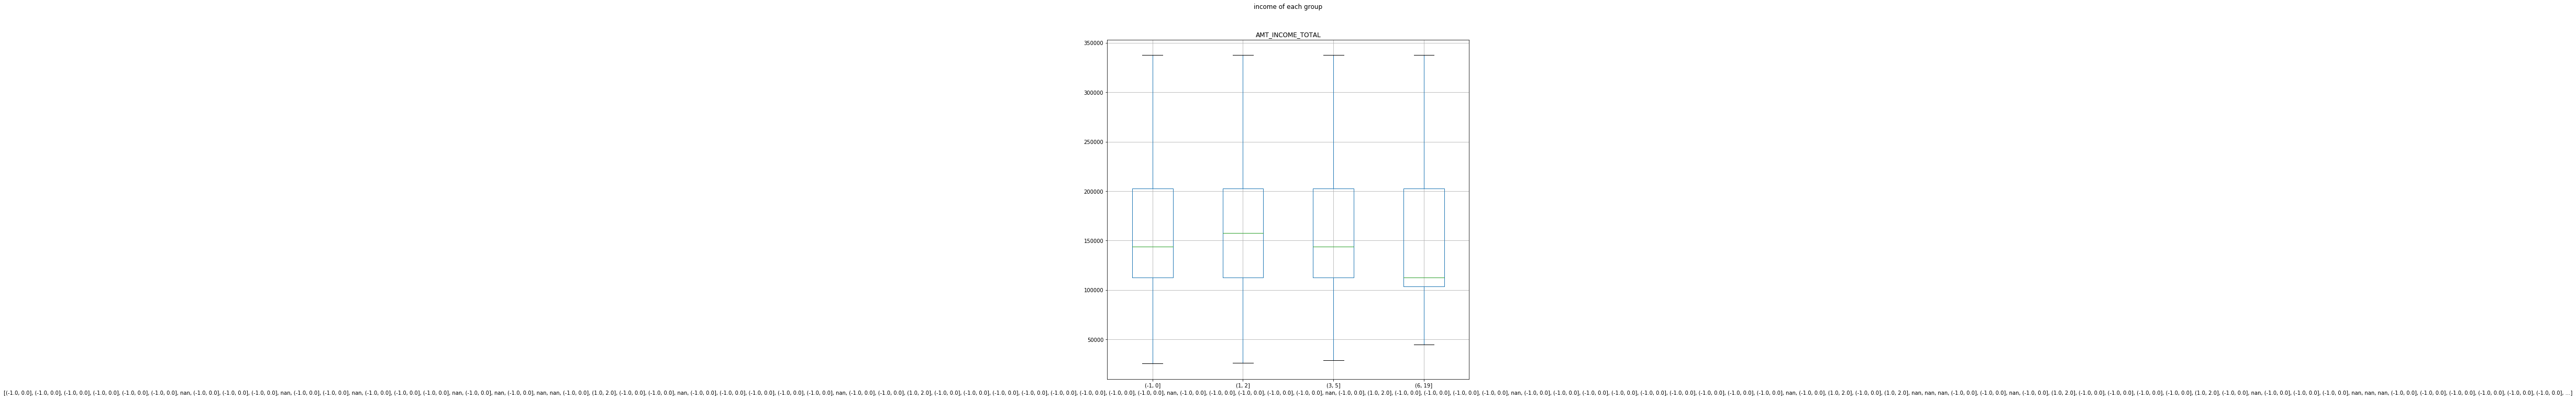

In [24]:
#2-2
"""
Your code here
"""
plt_column = ['AMT_INCOME_TOTAL']##因為是直接用df.boxplot，所以輸入的column直接用該column的名字就好了
plt_by =grp

app_train.boxplot(column=plt_column, by = plt_by, showfliers = False, figsize=(12,12))
plt.suptitle('income of each group')
plt.show()

In [25]:
#3
"""
Your code here
"""
app_train['AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET'] = grouped_df.apply(lambda x:(x-np.mean(x))/(np.std(x)) )

app_train[['AMT_INCOME_TOTAL','AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET']].head()

,AMT_INCOME_TOTAL,AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET
0,202500.0,0.345857
1,270000.0,0.990556
2,67500.0,-0.943540
3,135000.0,-0.298841
4,121500.0,-0.427781
